##Importing Libraires

In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

##DataSet Import

In [8]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [9]:
df.dropna(inplace = True)

In [10]:
df.shape

(714, 3)

In [11]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


##Input/Output train test split

In [12]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
X_train.head(), X_test.head(), y_train.head(), y_test.head()

(      Age     Fare
 328  31.0  20.5250
 73   26.0  14.4542
 253  30.0  16.1000
 719  33.0   7.7750
 666  25.0  13.0000,
       Age   Fare
 149  42.0  13.00
 407   3.0  18.75
 53   29.0  26.00
 369  24.0  69.30
 818  43.0   6.45,
 328    1
 73     0
 253    0
 719    0
 666    0
 Name: Survived, dtype: int64,
 149    0
 407    1
 53     1
 369    1
 818    0
 Name: Survived, dtype: int64)

##Accuracy without Binning

In [17]:
clf = DecisionTreeClassifier()

In [20]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6223776223776224

In [21]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10, scoring = 'accuracy'))

np.float64(0.6359154929577465)

##Applying Quantile Binning Technique

In [46]:
kbin_age = KBinsDiscretizer(n_bins = 15, encode = 'ordinal', strategy = 'quantile')
kbin_fare = KBinsDiscretizer(n_bins = 15, encode = 'ordinal', strategy = 'quantile')

In [47]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [48]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [49]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [50]:
output = pd.DataFrame({
    'age': X_train['Age'],
    'age_trf': X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:,1],
})

In [51]:
output['age_labels'] = pd.cut(x = X_train['Age'], bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x = X_train['Fare'], bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [52]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
594,37.0,10.0,26.000,9.0,"(35.0, 38.0]","(18.75, 26.0]"
748,19.0,3.0,53.100,12.0,"(16.0, 19.0]","(51.479, 76.292]"
465,38.0,11.0,7.050,0.0,"(35.0, 38.0]","(0.0, 7.25]"
86,16.0,2.0,34.375,11.0,"(6.0, 16.0]","(31.275, 51.479]"
597,49.0,13.0,0.000,0.0,"(47.0, 54.0]",NaN


In [53]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)
accuracy_score(y_test, y_pred2)

0.6363636363636364

In [55]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X_trf, y, cv = 10, scoring = 'accuracy'))

np.float64(0.6723004694835681)

#####Certain improvemnet can be sen in Accuracy although not enogh due to dataset not being fit for this binning

##Function for Binning and also plotting of the Data

In [58]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Age_Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("Age_After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Fare_Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare_After")

    plt.show()

0.6302425665101721


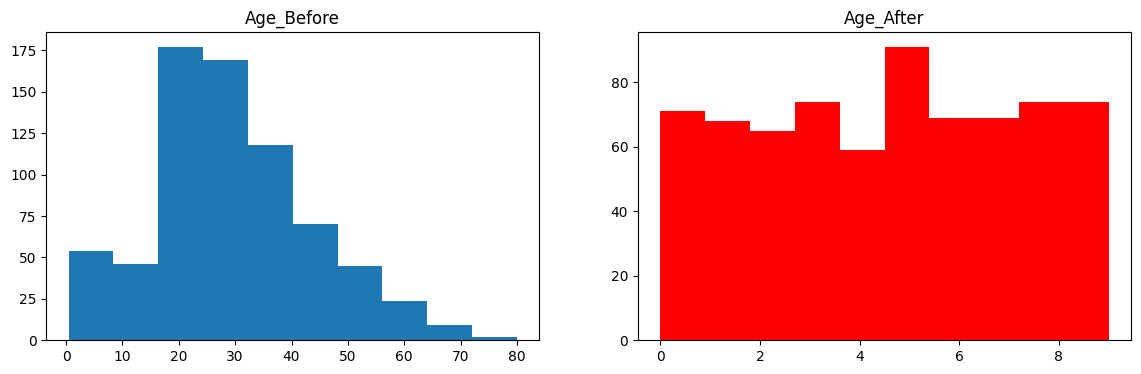

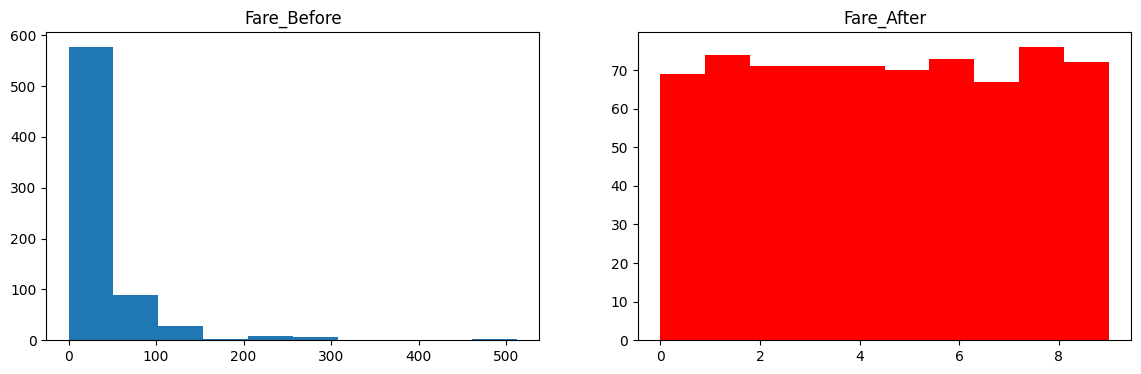

In [61]:
discretize(10, 'quantile')